In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
import pandas as pd
import numpy as np

In [7]:
path = './heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
X = df[['cp', 'thalach', 'exang', 'oldpeak']]
Y = df["target"]

In [10]:
model = Sequential([
Dense(20, activation='relu', input_shape=(4,)),
Dense(10, activation='relu'),
Dense(1, activation='softmax')
])

c:\Users\zoety\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (717, 4) (717,)
Test set: (308, 4) (308,)


In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5


c:\Users\zoety\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 14.8963  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5000 - loss: 0.6925  
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 0.6846 
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.6902 
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5095 - loss: 0.6904  


In [14]:
training_accuracy = model.history.history['accuracy']
max(training_accuracy)

0.5188284516334534

In [15]:
training_loss = model.history.history['loss']
min(training_loss)

0.6887889504432678

In [16]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.6977  


c:\Users\zoety\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[0.7001029253005981, 0.5]

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

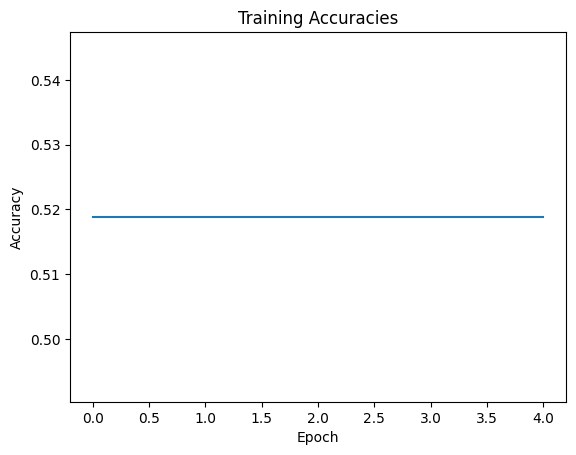

In [18]:
plt.plot(training_accuracy)
plt.title('Training Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

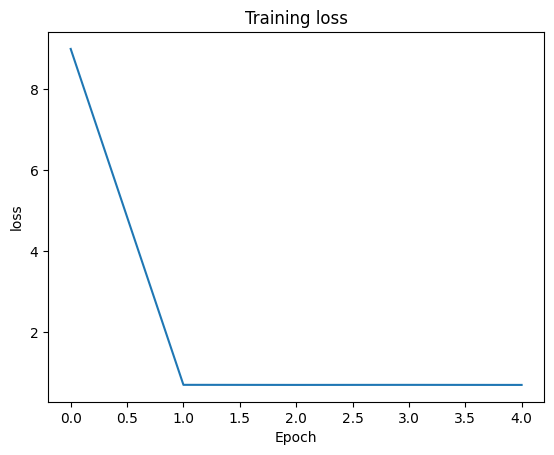

In [19]:
plt.plot(training_loss)
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

In [20]:
pred = pd.DataFrame([[1,2,3,4]])
model.predict(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


c:\Users\zoety\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


array([[1.]], dtype=float32)

In [23]:
import dill as dl
dl.detect.trace(True)
with open("final_model.pkl", "wb") as file:
    dl.dump(model, file)

┬ T4: <class 'keras.src.models.sequential.Sequential'>
└ # T4 [45 B]
┬ D2: <dict object at 0x21b73471000>
├┬ T4: <class 'keras.src.utils.tracking.Tracker'>
│└ # T4 [39 B]
├┬ D2: <dict object at 0x21b78508440>
│├┬ D2: <dict object at 0x21b734704c0>
││├┬ F1: <function Layer._initialize_tracker.<locals>.<lambda> at 0x0000021B734627A0>
│││├┬ F2: <function _create_function at 0x0000021B7B238A40>
││││└ # F2 [34 B]
│││├┬ Co: <code object <lambda> at 0x0000021B712B6E30, file "c:\Users\zoety\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\layers\layer.py", line 310>
││││├┬ F2: <function _create_code at 0x0000021B7B238F40>
│││││└ # F2 [19 B]
││││└ # Co [362 B]
│││├┬ D4: <dict object at 0x21b713183c0>
││││└ # D4 [33 B]
│││├┬ D2: <dict object at 0x21b7ad46600>
││││└ # D2 [2 B]
│││├┬ D2: <dict object at 0x21b7b883bc0>
││││├┬ D2: <dict object at 0x21b7b013b00>
│││││└ # D2 [2 B]
││││└ # D2 [41 B]
│││└ # F1 [484 B]
││├┬ F1: <function Layer._initialize_tracker.<locals>.<lambda> at 0

TypeError: cannot pickle 'FuncGraph' object

In [ ]:
with open('final_model.pkl', 'rb') as file:
    loaded_model = dl.load(file)

In [ ]:
#import libraries
import numpy as np
from flask import Flask, render_template,request
import pickle#Initialize the flask App
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
#default page of our web-app
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
#To use the predict button in our web-app
@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2)
    return render_template('index.html', prediction_text='CO2    Emission of the vehicle is :{}'.format(output))

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)